In [1]:
import numpy as np
import pandas as pd
import scipy

In [2]:
from ecoevocrm.consumer_resource_system import *
from ecoevocrm.consumer_resource_system import *
import ecoevocrm.utils as utils
import ecoevocrm.viz as viz
import ecoevocrm.coarse_graining as cg
import ecoevocrm.strain_pool

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

----

## Model parameters

### Traits

Set the number of resources in the system:

In [4]:
num_traits = 6

Define type(s) that will be present at the start of the simulation:

Here we define the initial population as consisting of only one type (which is the first type from the list of all possible types)

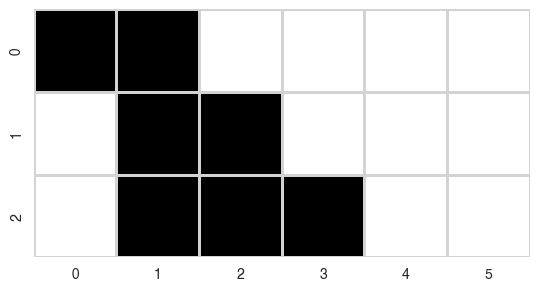

In [5]:
sigma = np.array([[1, 1, 0, 0, 0, 0],
                  [0, 1, 1, 0, 0, 0],
                  [0, 1, 1, 1, 0, 0]])

viz.matrix_plot(sigma, linecolor='lightgray', linewidths=1)

Set the initial abundance of each type:
    
(Here we set the initial abundance of each type to 1 individual)

In [6]:
N_init = np.ones(np.atleast_2d(sigma).shape[0])
N_init

array([1., 1., 1.])

In [7]:
mu = np.array([[0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 1e-10, 1e-10]])

mu

array([[0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00],
       [0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00],
       [0.e+00, 0.e+00, 0.e+00, 0.e+00, 1.e-10, 1.e-10]])

### Costs

##### Define cost parameters for types:

Set the baseline cost $\xi$:

In [8]:
xi = 0.1

Set the cost per trait, $\chi_{i}$:

In [9]:
chi = 0.3

Set the trait interaction costs by defining a matrix, $\\J_{ij}$, that encodes the cost for each pair of traits:

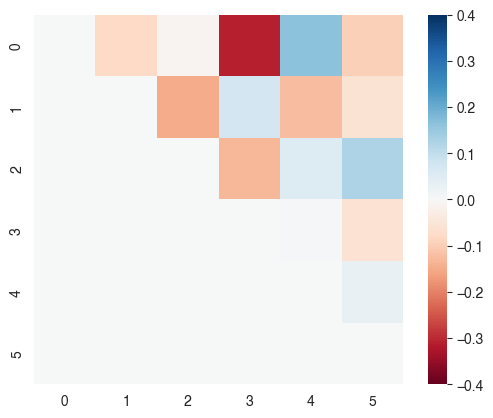

In [10]:
# J = None
J = utils.random_matrix((num_traits, num_traits), 'tikhonov_sigmoid', args={'n_star': 5, 'delta': 1}, triangular=True, diagonal=0, 
                        seed=2)
viz.matrix_plot(J, vmin=-0.4, vmax=0.4)

### Environment

Set the initial amount of each resource:

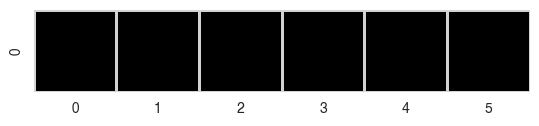

In [11]:
R_init = np.ones(num_traits)
viz.matrix_plot(R_init, vmin=0, vmax=1, cbar=False, linecolor='lightgray', linewidths=1)

Set the influx of each resource:

(Here the last 5 resources have influx, while the first 5 resources have zero influx)

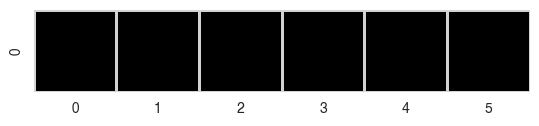

In [12]:
rho = np.ones(num_traits)
viz.matrix_plot(rho, vmin=0, vmax=1, cbar=False, linecolor='lightgray', linewidths=1)

Set the time constant for resource dynamics (will be 1 in practically all cases)

In [13]:
tau = 1

Set the resource dynamics mode used in the simulation. 

(In many basic scenarios we use 'fast resource equilibration' ('fasteq') dynamics)

In [14]:
resource_dynamics_mode='fasteq'

## Simulate model

In [15]:
system = ConsumerResourceSystem(type_set=TypeSet(sigma=sigma, xi=xi, chi=chi, J=J, binarize_traits_J_cost_terms=True, 
                                                 mu=mu), 
                                rho=rho, tau=tau,
                                N_init=N_init, R_init=R_init, 
                                resource_dynamics_mode='explicit')

In [16]:
system.type_set.typeIDs

array([48, 24, 28])

In [17]:
system.type_set.__dict__

{'num_traits': 6,
 '_sigma': <ecoevocrm.utils.ExpandableArray at 0x1220c42b0>,
 '_beta': array([1., 1., 1., 1., 1., 1.]),
 '_kappa': array([1.e+10, 1.e+10, 1.e+10, 1.e+10, 1.e+10, 1.e+10]),
 '_eta': array([1., 1., 1., 1., 1., 1.]),
 '_lamda': array([0., 0., 0., 0., 0., 0.]),
 '_gamma': 1.0,
 '_xi': 0.1,
 '_chi': array([0.3, 0.3, 0.3, 0.3, 0.3, 0.3]),
 '_J': array([[ 0.        , -0.07939855, -0.00991193, -0.3123369 ,  0.16402708,
         -0.09646582],
        [ 0.        ,  0.        , -0.14828172,  0.07352715, -0.12452881,
         -0.05690543],
        [ 0.        ,  0.        ,  0.        , -0.13290756,  0.0551454 ,
          0.12329394],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.00415394,
         -0.06013129],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.02899502],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ]]),
 '_mu': <ecoevocrm.utils.ExpandableArray at 0x1220c4310>,

In [18]:
system.mutant_set.typeIDs

array([30, 29])

In [19]:
system.mutant_set.__dict__

{'num_traits': 6,
 '_sigma': <ecoevocrm.utils.ExpandableArray at 0x1220c4340>,
 '_beta': array([1., 1., 1., 1., 1., 1.]),
 '_kappa': array([1.e+10, 1.e+10, 1.e+10, 1.e+10, 1.e+10, 1.e+10]),
 '_eta': array([1., 1., 1., 1., 1., 1.]),
 '_lamda': array([0., 0., 0., 0., 0., 0.]),
 '_gamma': 1.0,
 '_xi': 0.1,
 '_chi': array([0.3, 0.3, 0.3, 0.3, 0.3, 0.3]),
 '_J': array([[ 0.        , -0.07939855, -0.00991193, -0.3123369 ,  0.16402708,
         -0.09646582],
        [ 0.        ,  0.        , -0.14828172,  0.07352715, -0.12452881,
         -0.05690543],
        [ 0.        ,  0.        ,  0.        , -0.13290756,  0.0551454 ,
          0.12329394],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.00415394,
         -0.06013129],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.02899502],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ]]),
 '_mu': <ecoevocrm.utils.ExpandableArray at 0x1220ba820>,

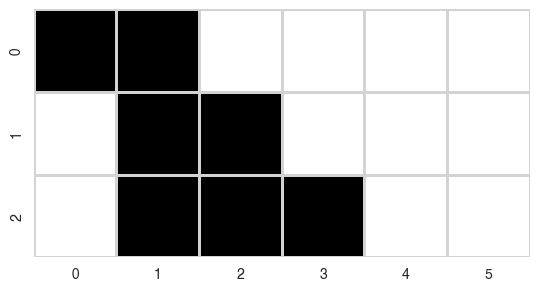

In [20]:
viz.matrix_plot(system.type_set.sigma, linecolor='lightgray', linewidths=1)

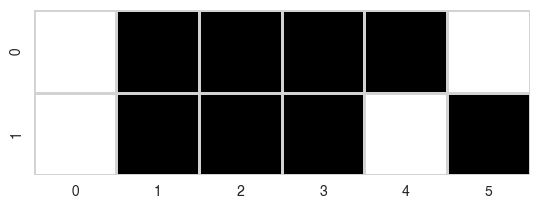

In [21]:
viz.matrix_plot(system.mutant_set.sigma, linecolor='lightgray', linewidths=1)

In [22]:
system.type_set.mu

array([[0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00],
       [0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00],
       [0.e+00, 0.e+00, 0.e+00, 0.e+00, 1.e-10, 1.e-10]])

In [23]:
system.mutant_set.mu

array([[0.e+00, 0.e+00, 0.e+00, 0.e+00, 1.e-10, 1.e-10],
       [0.e+00, 0.e+00, 0.e+00, 0.e+00, 1.e-10, 1.e-10]])

In [24]:
# stop

In [25]:
T_total = 1e6

In [26]:
system.run(T=T_total)

[ Mutation event occurred at  t=12.1405 3/3*(2)]	
[ Mutation event occurred at  t=12.3455 4/4*(4)]	
[ Mutation event occurred at  t=12.8250 4/4*(4)]	
[ Mutation event occurred at  t=13.0209 5/5*(6)]	
[ Mutation event occurred at  t=13.4242 5/5*(6)]	
[ Mutation event occurred at  t=13.8261 5/5*(6)]	
[ Mutation event occurred at  t=15.9637 5/5*(6)]	
[ Mutation event occurred at  t=16.0446 5/5*(6)]	
[ Mutation event occurred at  t=16.4038 5/5*(6)]	
[ Mutation event occurred at  t=18.9320 5/5*(6)]	
[ Mutation event occurred at  t=19.0836 5/5*(6)]	
[ Mutation event occurred at  t=19.3048 5/5*(6)]	
[ Mutation event occurred at  t=19.4673 5/5*(6)]	
[ Mutation event occurred at  t=20.3230 5/5*(6)]	
[ Mutation event occurred at  t=21.2098 5/5*(6)]	
[ Mutation event occurred at  t=21.3385 5/5*(6)]	
[ Mutation event occurred at  t=21.6305 5/5*(6)]	
[ Mutation event occurred at  t=23.1192 5/5*(6)]	
[ Mutation event occurred at  t=23.7717 5/5*(6)]	
[ Mutation event occurred at  t=24.1301 5/5*(6)]	


/usr/local/lib/python3.9/site-packages/ecoevocrm/type_set.py:644: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._mutant_indices = np.array(self._mutant_indices)[type_order].tolist() if self._mutant_indices is not None else None


<AxesSubplot: >

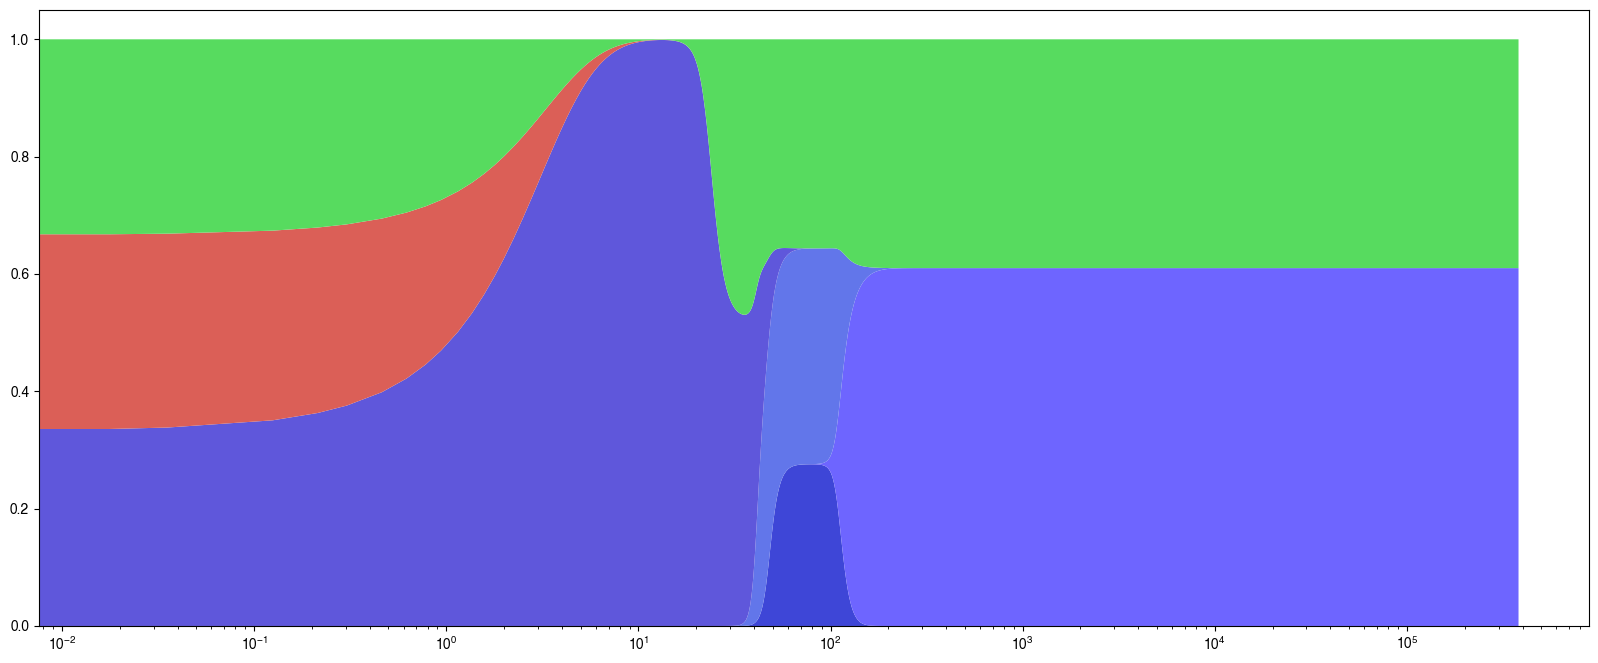

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
viz.stacked_abundance_plot(system, ax=ax, relative_abundance=True, apply_palette_depth=0, log_x_axis=True, color_seed=4)

<AxesSubplot: >

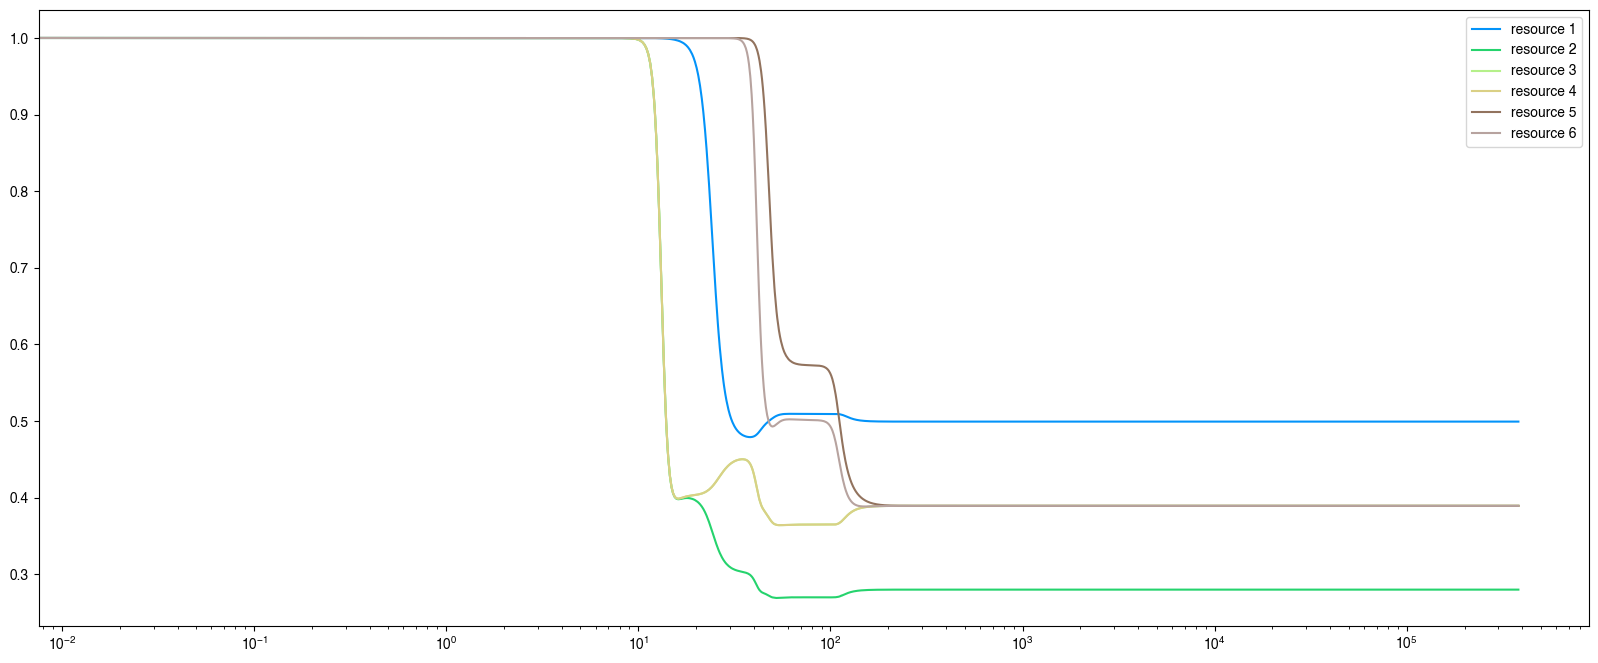

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
viz.resource_plot(system, ax=ax, stacked=False, relative=False, log_x_axis=True, log_y_axis=False)

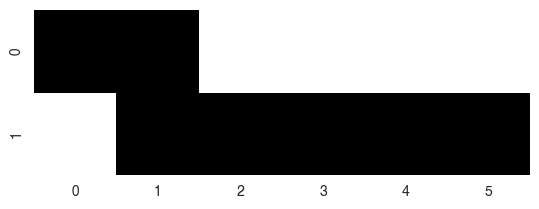

In [29]:
viz.matrix_plot(system.extant_type_set.sigma)

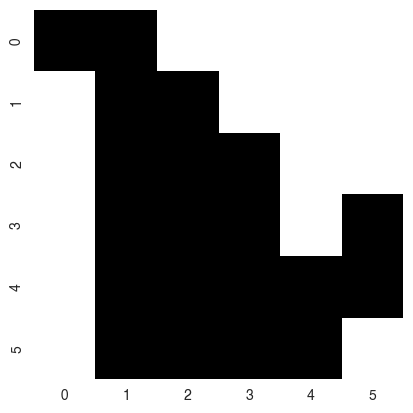

In [30]:
viz.matrix_plot(system.type_set.sigma)

In [31]:
system.type_set.typeIDs

[48, 24, 28, 29, 31, 30]

In [32]:
system.type_set._parent_indices

[None, None, None, 2, 3, 2]

In [33]:
system.type_set.lineageIDs

['1', '2', '3', '3.1', '3.1.1', '3.2']

In [34]:
system.type_set._mutant_indices

[[], [], [0, 1], [2, 3], [6, 7], [4, 5]]

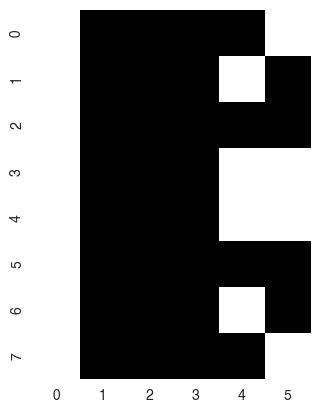

In [35]:
viz.matrix_plot(system.mutant_set.sigma)

In [36]:
system.mutant_set._parent_indices

[2, 2, 3, 3, 4, 4, 5, 5]

In [37]:
system.mutant_set._typeIDs

[30, 29, 31, 28, 28, 31, 29, 30]

In [38]:
stop

NameError: name 'stop' is not defined

------

In [ ]:
np.set_printoptions(threshold=np.inf)
np.set_printoptions(precision=4)

In [ ]:
system.N

In [ ]:
system.N_series[system.N != 0, -700:-665]

In [ ]:
for u in range(len(system.N)):
    plt.plot(system.t_series, system.N_series[u])
plt.xscale('log')
plt.yscale('log')

---------
---------

In [ ]:
sigma

In [ ]:
mush = mu

In [ ]:
mu = np.array([[0, 0, 0, 0, 0, 0], 
               [0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 1.e-10, 1.e-10]])

In [ ]:
sigma_mut        = []
mutantIDs        = []
generation_rates = []

for u in range(sigma.shape[0]):
    mu_u = mu[u] if mu.ndim == 2 else mu
    print("mu_u", mu_u)
    if(np.any(mu_u > 0)):
        for i in (np.where(mu_u > 0)[0] if mu_u.ndim == 1 else range(sigma.shape[1])):
            sigma_mut.append(sigma[u] ^ [0 if j!=i else 1 for j in range(sigma.shape[1])])
            generation_rates.append(mu_u[i] if mu_u.ndim == 1 else mu_u)
                    
sigma_mut = np.array(sigma_mut)
print(f"sigma_mut\n{sigma_mut}")
print("generation_rates", generation_rates)

In [ ]:
sigma_mut      = []
mutantIDs      = []
mutation_rates = []

for u in range(sigma.shape[0]):
    
    if(np.all(mu[u] <= 0)):
        print("no mutants")
        continue          
    else:
        sigma_u = sigma[u]
        for i in np.where(mu[u] > 0)[0]:
            print("sigma_u", sigma_u)
            print("i =", i)
            sigma_mut.append(sigma[u] ^ [0 if j!=i else 1 for j in range(sigma.shape[1])])
            mutation_rates.append(mu[u, i])
    
sigma_mut = np.array(sigma_mut)
print(f"sigma_mut\n{sigma_mut}")
print("mutation_rates", mutation_rates)


In [ ]:
mu

In [ ]:
len(mu)

In [ ]:
type_idx  = [1, 2]
mutantIDs = [[], [], [30, 29]]

[m for mutIDs_u in mutantIDs[idx] for m in mutIDs_u for idx in type_idx]

In [ ]:
for u in type_idx:
    for mutIDs_u in mutantIDs_sel:
        for m in mutIDs_u:
            print(m)

In [ ]:
[mutantIDs[u] for u in type_idx]

In [ ]:
[m for mutIDs_u in ([mutantIDs[u] for u in type_idx]) for m in mutIDs_u]

In [ ]:
a = [0, 2, 4]
p = [2, 2, 4, 4]

In [ ]:
np.searchsorted(a, p)